# <center> PCA with GROMACS <center>

# Contents

This notebook is used for processing the output of a Principal Component Analysis (PCA) on a molecular dynamics trajectory. It reads the PCA results stored in '2dproj_M3_BB.xvg', splits each line into columns, and stores the data in a pandas DataFrame. This structured format enables convenient analysis and visualization of the PCA results.

# Usage

- Set Path: Adjust the path to the directory containing your PCA trajectory files.
- Read and Process Data: Load the PCA file, split the data into columns, and store it in a DataFrame.
- Analyze and Visualize: Utilize the DataFrame to analyze and visualize the PCA results as required.
- Save Results: Optional step to save the processed data or plots.

# Path Configuration

Set the paths to the directories containing your PCA trajectory files. These paths should be adapted based on the Zenodo archive where the data is stored:

- All Trajectory : exemple "/Data/Trajectory/ESM/"
- PCA result : "/Data/Analyse/PCA/data"

# Dependencies

- Python 3.x
- os
- matplotlib
- seaborn
- pandas

In [1]:
import os
import sys
import matplotlib as plt
import seaborn as sns
import pandas as pd

### Adresse des dossier qui contient les trajectoires d'un modeles

In [4]:
path_trj = "/run/media/sritharan/TOSHIBA EXT/These/Projet/MCTP4/Model_entier/ALL_MCTP/MCTP4/TMR"

path_ESM = path_trj+"/Data/Trajectory/ESM/"
path_omega = path_trj+"/Data/Trajectory/OMEGA/"
path_Rose= path_trj+"/Data/Trajectory/ROSE/"
path_TrRose= path_trj+"/Data/Trajectory/TR-ROSE/"

In [5]:
os.chdir(path_trj)

# Projection PCA

In [8]:
x = []
y = []

with open("2dproj_M3_BB.xvg", "r") as f1:
    lignes = f1.readlines()
for ligne in lignes:
    col = ligne.split()
    if ligne.startswith("#") or ligne.startswith("@"):
        continue
    else:
        # Append the first column as a float to list x
        x.append(float(col[0]))
        # Append the second column as a float to list y
        y.append(float(col[1]))


data = pd.DataFrame(data=x, columns=["eigenvector_1"])


data["eigenvector_2"] = y

In [9]:
def add_group(df,colnames):
    data_list=[]
    
    if colnames =="md":
        group=0
        for i in range(len(df)):
            if i % 301==0:
                group+=1
                data_list.append(f"start-{group}")
            else:
                data_list.append(f"{group}")
        df['md']=data_list
    
    if colnames =="size":
        for i in range(len(df)):
            if i % 301==0:
                group="start"
                data_list.append(f"{group}")
            else:
                group = "frame"
                data_list.append(f"{group}")
        df['size']=data_list
    
    if colnames =="marker":

        for i in range(len(df)):
            if i % 301==0:
                group="start"
                data_list.append(f"{group}")
            else:
                group = "frame"
                data_list.append(f"{group}")
        df['marker']=data_list
    
    if colnames == "color":
        group=0
        for i in range(len(df)):
            if i % 301==0:
                group+=1
                data_list.append(f"{group}")
            else:
                data_list.append(f"{group}")
        df['color']=data_list
    
    if colnames == "models":
        group=0
        for i in range(len(df)):
            if i % 301==0:
                group+=1
                
            if group <= 4:
                data_list.append(f"{'Rose'}")
            if group >4 and group <=8:
                data_list.append(f"{'TR'}")
            if group >8 and group <=12:
                data_list.append(f"{'AFM'}")
            if group >12 and group <=16:
                data_list.append(f"{'ESM'}")
            if group >16 and group <=20:
                data_list.append(f"{'OMEGA'}")
            if group >20:
                data_list.append(f"{'AF2'}")
            
        df['models']=data_list
            
            
            
        
          
    return df


In [10]:
data_bis=add_group(data,"md")
data_bis=add_group(data,"size")
data_bis=add_group(data,"marker")
data_bis=add_group(data,"color")
data_bis=add_group(data,"models")

In [11]:
data_bis.to_csv('data_bis.csv')

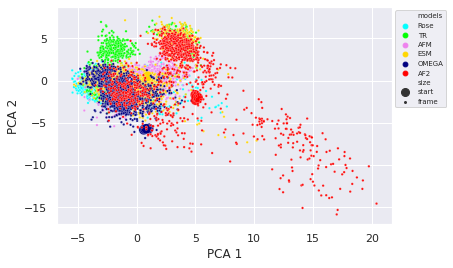

In [12]:
marker = {"start": "p", "frame": "o"}
sizes = (6, 100)
sns.set(style="darkgrid")
colors = ["aqua", "lime", "violet","gold","navy", "red"]

pca = sns.scatterplot(
    data=data_bis,
    x='eigenvector_1',
    y='eigenvector_2',
    hue="models",
    size="size",
    sizes=sizes,  # Referencing the sizes variable
    markers=marker,
    palette=colors,
    alpha=0.9,  # Define overall marker transparency
)


pca.set(xlabel="PCA 1", ylabel="PCA 2")


pca.legend(
    bbox_to_anchor=(1, 1),
    loc='upper left',
    fontsize=7,
    markerscale=0.8
)

pca.figure.savefig('PCA1.png', dpi=600, bbox_inches='tight', pad_inches=0.1)


# frequence cumulé

In [13]:

!cat covar_M3_BB.log

Covariance analysis log, written Tue Apr 18 17:22:32 2023

Program: covar
Working directory: /data/sritharan/Paris/Analyses_models/PCA/Final

Read 7224 frames from md_traj-all.xtc (time 0 to 3e+06 ps)
Read reference structure for fit from md-500.gro
Read index groups from index_BB.ndx

Analysis group is 'BB' (72 atoms)
Fit group is 'BB' (72 atoms)
Analysis is non-mass weighted
Fit is non-mass weighted
Diagonalized the 216x216 covariance matrix
Trace of the covariance matrix before diagonalizing: 36.5062
Trace of the covariance matrix after diagonalizing: 36.5062

Wrote 216 eigenvalues to Resultats/eigenval.xvg
Wrote reference structure to Resultats/eigenvec.trr
Wrote average structure to Resultats/average_M3_BB.pdb and Resultats/eigenvec.trr
Wrote eigenvectors 1 to 216 to Resultats/eigenvec.trr


This command is reading data from eigenval.xvg, calculating a running total of the second column (ignoring lines starting with "#" or "@"), normalizing it by 36.5062, and writing the result to frequence_cumuler.xvg, preserving the first column of the original dat

In [14]:

!awk '{if (substr($1,1,1) != "#" && substr($1,1,1) != "@") { s+=$2;printf("%d %f\n",$1,s/36.5062); } }' eigenval.xvg >frequence_cumuler.xvg


216


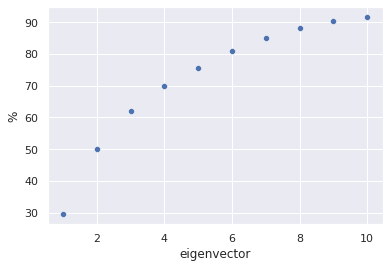

In [15]:
x = []
y = []

with open("frequence_cumuler.xvg", "r") as f1:
    for line in f1:
        # Ignore lines starting with '#' or '@'
        if not line.startswith(("#", "@")):
            # Split the line into columns and append to respective lists
            cols = line.split()
            x.append(int(cols[0]))
            y.append(float(cols[1]) * 100)

print(len(x))

data3 = pd.DataFrame({
    "eigenvector": x[:10],
    "%": y[:10]
})

egvalue = sns.scatterplot(data=data3, x='eigenvector', y="%")
egvalue.figure.savefig("egvalue_freq-cumule.png")



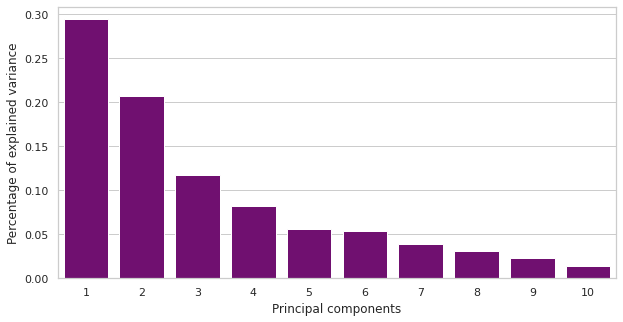

In [26]:

data = pd.read_csv("frequence_cumuler.xvg", sep=" ", header=None, names=["composante", "freq_cumulee"])
data["freq"] = data["freq_cumulee"].diff().fillna(data["freq_cumulee"])
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="composante", y="freq", data=data[:10], color="purple")
plt.xlabel("Principal components")
plt.ylabel("Percentage of explained variance")
plt.savefig("frequencies.png")


In [27]:
print(data)

     composante  freq_cumulee      freq
0             1      0.294246  0.294246
1             2      0.501273  0.207027
2             3      0.618977  0.117704
3             4      0.700648  0.081671
4             5      0.757222  0.056574
..          ...           ...       ...
211         212      1.000001  0.000000
212         213      1.000001  0.000000
213         214      1.000001  0.000000
214         215      1.000001  0.000000
215         216      1.000001  0.000000

[216 rows x 3 columns]


In [24]:
import pandas as pd

def process_file(file_path):
    x = []
    y = []

    with open(file_path, "r") as f:
        lines = f.readlines()
    
    for line in lines:
        cols = line.split()
        if line.startswith("#") or line.startswith("@"):
            continue
        else:
            x.append(float(cols[0]))
            y.append(float(cols[1]))

    data = pd.DataFrame(data=x, columns=["eigenvector_1"])
    data["eigenvector_2"] = y
    
    data = add_group(data, "md")
    data = add_group(data, "size")
    data = add_group(data, "marker")
    data = add_group(data, "color")
    data = add_group(data, "models")
    
    return data

file_paths = [
    "../Resultats/2dproj_M3_BB.xvg",
    "../Resultats/2dproj_PC1_PC3.xvg",
    "../Resultats/2dproj_PC1_PC4.xvg"
]

data_frames = [process_file(file_path) for file_path in file_paths]




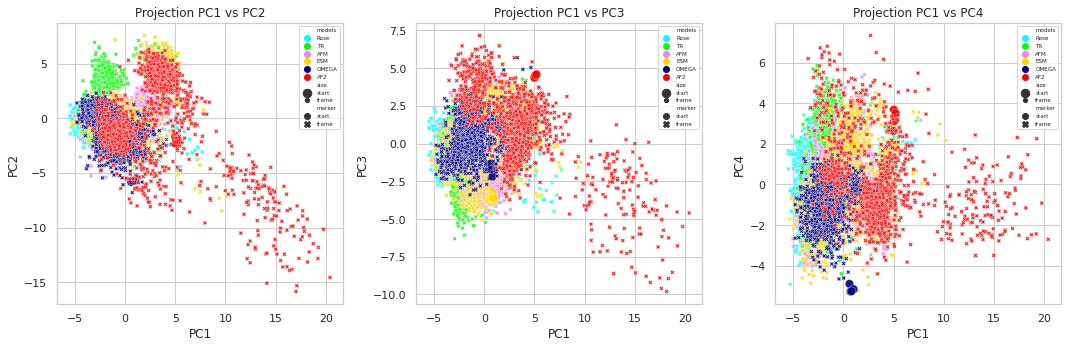

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

data_frames = [process_file(file_path) for file_path in file_paths]
fig, axs = plt.subplots(nrows=1, ncols=len(data_frames), figsize=(15, 5))
colors = ["aqua", "lime", "violet", "gold", "navy", "red"]

for i, data in enumerate(data_frames):
    sns.scatterplot(ax=axs[i], data=data, x='eigenvector_1', y='eigenvector_2', hue='models', size='size', style='marker', palette=colors, alpha=0.9)
    axs[i].set_xlabel('PC1')
    axs[i].set_ylabel(f'PC{i + 2}')
    axs[i].set_title(f'Projection PC1 vs PC{i + 2}')
    axs[i].legend(fontsize=5.6)

plt.tight_layout()
plt.savefig("combinaison-PC.png", dpi=600)
plt.show()
